In [20]:
import torch
import math
y_pre = torch.tensor([-0.1, 0.2])
y_pre_log = y_pre.sigmoid()
print(y_pre_log)
# tensor([0.4750, 0.5498])
print((math.log(0.4750)+math.log(0.5498))/2)
y_tar = torch.tensor([1.,1.])
loss = torch.nn.BCELoss()

print(loss(y_pre_log, y_tar))
log_loss = torch.nn.BCEWithLogitsLoss()
log_loss(y_pre, y_tar)

tensor([0.4750, 0.5498])
-0.6713205890992439
tensor(0.6713)


tensor(0.6713)

In [30]:
import torch
tar = torch.tensor([[1.,1.,1.], [0.,1.,1.], [1., 0., 1.]])
pre = torch.tensor([[0.9,0.8,0.5], [0.6,0.48,0.95], [0.9,0.1,0.6]])
bceloss = torch.nn.BCELoss()
print(bceloss(pre, tar))

tensor(0.3828)


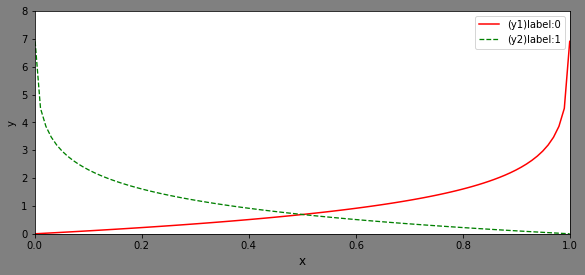

In [20]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0.001,0.999,100)
c = 0
y1 = - (1-c)*np.log(1-x) - c*np.log(x)
c = 1
y2 = - (1-c)*np.log(1-x) - c*np.log(x)
plt.figure(figsize=(9.6,4.1),facecolor='gray',edgecolor='black')
plt.xlim((0,1))
plt.ylim((0,8))
plt.xlabel('x',fontsize=12)
plt.ylabel('y')
plt.plot(x,y1,color='r', label="(y1)label:0")
plt.plot(x,y2,color='g',linewidth=1.3,linestyle='--', label="(y2)label:1")
plt.legend(loc='upper right')
plt.savefig("bce.png", dpi=300)
plt.show()


In [26]:
import math
math.log(2)
from math import log
log(2)
(1*log(0.9)+(1-1)*log(1-0.9))


-0.10536051565782628

In [28]:
(1*log(0.8)+(1-1)*log(1-0.8))

-0.2231435513142097

In [27]:
(1*log(0.5)+(1-1)*log(1-0.5))

-0.6931471805599453

In [30]:
la=(1*log(0.9)+(1-1)*log(1-0.9))+(1*log(0.8)+(1-1)*log(1-0.8))+(1*log(0.5)+(1-1)*log(1-0.5))

In [31]:
la/3

-0.34055041584399376

In [33]:
lb = (0*log(0.6)+(1-0)*log(1-0.6))+(1*log(0.48)+(1-1)*log(1-0.48))+(1*log(0.95)+(1-1)*log(1-0.95))

In [34]:
lb/3

-0.567184400447302

In [36]:
lc = (1*log(0.9)+(1-1)*log(1-0.9))+(0*log(0.1)+(1-0)*log(1-0.1))+(1*log(0.6)+(1-1)*log(1-0.6))

In [37]:
lc/3


-0.24051555169388109

In [38]:
-0.34055041584399376-0.567184400447302-0.24051555169388109

-1.1482503679851768

In [39]:
-1.1482503679851768/3

-0.3827501226617256

In [41]:
log(math.e)

1.0

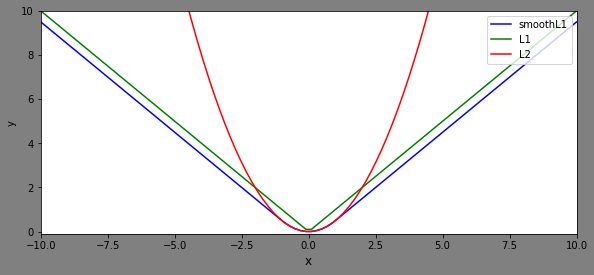

In [49]:
from matplotlib import pyplot as plt
import numpy as np
def smoothl1(x):
    if abs(x) < 1:
        return 0.5*pow(x,2)
    else:
        return abs(x)-0.5

def l1(x):
    return abs(x)
x = np.linspace(-10, 10, 100)
y1 = []
y2 = []
for e in list(x):
    y1.append(smoothl1(e))
y1 = np.array(y1)
y2 = l1(x)
y3 = 0.5*pow(x,2)
plt.figure(figsize=(9.6,4.1),facecolor='gray',edgecolor='black')
plt.xlim((-10,10))
plt.ylim((-0.1,10))
plt.xlabel('x',fontsize=12)
plt.ylabel('y')
plt.plot(x,y1,color='b', label="smoothL1")
plt.plot(x,y2,color='g', label="L1")
plt.plot(x,y3,color='r', label="L2")
plt.legend(loc='upper right')
plt.savefig("smoothl1.png", dpi=300)
plt.show()


In [89]:
import cv2
img = cv2.imread("1.jpeg")
patch = img[200:270,270:350,:]
center = (35, 40)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=135, scale=1)
rotated_image = cv2.warpAffine(src=patch, M=rotate_matrix, dsize=(80, 70))

w, h, c = img.shape
print(rotated_image[0][0])
print(any(rotated_image[0][0]))
for i in range(w//140):
    for j in range(h//180):
        # src1 = img[i*70:(i+1)*70,j*80:(j+1)*80,:]
        # src2 = rotated_image
        # dst = alpha*src1 + src2*beta + gamma
        # dst = cv2.addWeighted(src1, 0.1, src2, 0.9 , 0)
        pimg = img[i*70:(i+1)*70,j*80:(j+1)*80,:]
        for ii in range(70):
            for jj in range(80):
                if any(rotated_image):
                    pimg[ii,jj,:] = rotated_image[ii,jj,:]
        img[i*70:(i+1)*70,j*80:(j+1)*80,:] = pimg
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(dst)

[0 0 0]
False


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()